In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head(10)       # Shows first 10 data values

,Color,weight,Size,Fruit
0,B,100,20,C
1,G,1000,100,W
2,B,120,19,C
3,B,130,18,C
4,B,140,20,C
5,G,2000,101,W
6,G,1005,98,W
7,B,100,21,C
8,G,1002,102,W
9,B,100,15,C


In [6]:
data.shape      #specifoes the length of the data set row and columns

(29, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Color   29 non-null     object
 1   weight  29 non-null     int64 
 2   Size    29 non-null     int64 
 3   Fruit   29 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [8]:
data = data.values   #values will convert pandas dataframe into numpy array 

x = data[:,1:3]   # processed input data used for making predictions
y = data[:,-1]   # predicted value

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()        # calling the constructor of the label encoder
y = le.fit_transform(y)  # main method called for applying label encoder

In [18]:
y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1])

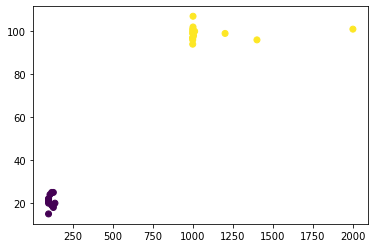

In [20]:
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

In [21]:
def dist(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [25]:
def KNN(x, y, queryPoint, k=5):
    vals = []      # store all the distances of querypoint from x.
    m = x.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, x[i])
        vals.append([d,y[i]])
        
    vals = sorted(vals)
    
    # nearest / first k points
    nearest_points = vals[:k]
    nearest_points = np.array(nearest_points)
    
    new_vals = np.unique(nearest_points[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    if pred == 0:
        return "Coconut"
    else:
        return "Watermelon"

In [35]:
point = [50,120] #coconut

In [36]:
KNN(x,y,point)

'Coconut'

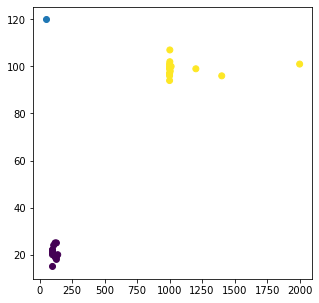

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(point[0],point[1])
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()